In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def read_csv(csv_file):
    # writer.writerow(["iter", "video_name", "category", "miou", "F_score"])  # header
    df = pd.read_csv(csv_file)

    return df

baseline_path = "/home/sophie/repos/AVSegFormer/output_files/eval_2209_s4_baseline.csv"
#model_path = "/home/sophie/repos/AVSegFormer/output_files/eval_2909_epochs5_sav-pretrained_s4_output.csv"
model_path = "/home/sophie/repos/AVSegFormer/output_files/eval_1809_duration5s_epochs5_sav-pretrained_s4.csv"

baseline_df = read_csv(baseline_path)
model_df = read_csv(model_path)

In [14]:
def calculate_avg_metrics_by_category(df):
    
    return df.groupby('category')[['miou', 'F_score']].mean()

def find_top_n(df, n=10):
    return df.nlargest(n, 'miou')


def find_bottom_n(df, n=10):
    return df.nsmallest(n, 'miou')  

In [15]:
baseline_met_by_cat = calculate_avg_metrics_by_category(baseline_df)
print(baseline_met_by_cat)

                                 miou   F_score
category                                       
ambulance_siren              0.718839  0.818916
baby_laughter                0.779868  0.863294
cap_gun_shooting             0.715643  0.842366
cat_meowing                  0.856293  0.919248
chainsawing_trees            0.663606  0.790522
coyote_howling               0.811052  0.918534
dog_barking                  0.855688  0.926507
driving_buses                0.787550  0.870953
female_singing               0.728746  0.822245
helicopter                   0.771171  0.890128
horse_clip-clop              0.790325  0.880993
lawn_mowing                  0.840868  0.921298
lions_roaring                0.902461  0.953110
male_speech                  0.875691  0.947946
mynah_bird_singing           0.860948  0.939883
playing_acoustic_guitar      0.851831  0.936037
playing_glockenspiel         0.797242  0.929799
playing_piano                0.858206  0.930453
playing_tabla                0.818188  0

In [16]:
print("Top-10 IoU Videos (baseline)")
print(find_top_n(baseline_df))

print("\nBottom-10 IoU Videos (baseline)")
print(find_bottom_n(baseline_df))

Top-10 IoU Videos (baseline)
     iter   video_name        category      miou   F_score
239   239  xTqBYLL5V4A   playing_piano  0.990638  0.993542
590   590  hQVtv8jxBCk  female_singing  0.986524  0.995038
601   601  -x360DnCJ5g  female_singing  0.986366  0.994444
580   580  6EckDSXOPyw  female_singing  0.984047  0.993812
253   253  AxeN3Geyzf4   lions_roaring  0.983815  0.994978
584   584  15fjb-8IyIQ  female_singing  0.981979  0.992236
387   387  DGI7xPh_qBE   playing_tabla  0.981889  0.992201
215   215  JFeN2HZz5Bg   playing_piano  0.981640  0.991124
319   319  8VryHooOcBE     male_speech  0.981619  0.992888
320   320  177a9Fdc4v8     male_speech  0.978477  0.992095

Bottom-10 IoU Videos (baseline)
     iter   video_name           category      miou   F_score
597   597  -rowxr24Xuw     female_singing  0.007090  0.324961
570   570  2qi-Dc1EkJo     female_singing  0.014524  0.394425
414   414  1qAX0df3cWE      driving_buses  0.018528  0.358454
596   596  -Qap2iJF8pI     female_singing

In [17]:
print(calculate_avg_metrics_by_category(model_df))

                                 miou   F_score
category                                       
ambulance_siren              0.379022  0.553518
baby_laughter                0.448071  0.730030
cap_gun_shooting             0.246250  0.369406
cat_meowing                  0.508073  0.692912
chainsawing_trees            0.168416  0.349844
coyote_howling               0.457792  0.633815
dog_barking                  0.414037  0.607243
driving_buses                0.452871  0.634439
female_singing               0.532055  0.706475
helicopter                   0.535369  0.739258
horse_clip-clop              0.475650  0.656815
lawn_mowing                  0.600376  0.806752
lions_roaring                0.572077  0.773781
male_speech                  0.527264  0.730719
mynah_bird_singing           0.539213  0.717014
playing_acoustic_guitar      0.462950  0.653669
playing_glockenspiel         0.640505  0.815628
playing_piano                0.506178  0.679441
playing_tabla                0.547806  0

In [18]:
print("Top-10 IoU Videos (5s 000-025 model)")
print(find_top_n(model_df))

print("\nBottom-10 IoU Videos (5s 000-025 model)")
print(find_bottom_n(model_df))

Top-10 IoU Videos (5s 000-025 model)
     iter   video_name                     category      miou   F_score
205   205  3ncqSfjo8U4                playing_piano  0.961157  0.987721
239   239  xTqBYLL5V4A                playing_piano  0.955252  0.986027
293   293  1u6Tg_oNI74                  male_speech  0.939234  0.979660
215   215  JFeN2HZz5Bg                playing_piano  0.934272  0.984747
245   245  3yXCtpvjz6E                lions_roaring  0.928980  0.972967
584   584  15fjb-8IyIQ               female_singing  0.924915  0.976881
187   187  NR_LXkTKLn0         playing_glockenspiel  0.924144  0.973225
96     96  HI1FHmDXlGk  typing_on_computer_keyboard  0.915815  0.977484
370   370  1oAo0Y3JBJk                playing_tabla  0.912714  0.953993
59     59  d2gP7PJV4EU           mynah_bird_singing  0.907738  0.963908

Bottom-10 IoU Videos (5s 000-025 model)
     iter   video_name           category      miou   F_score
471   471  eZm24b1rKXQ  chainsawing_trees  0.000000  0.031548
614   

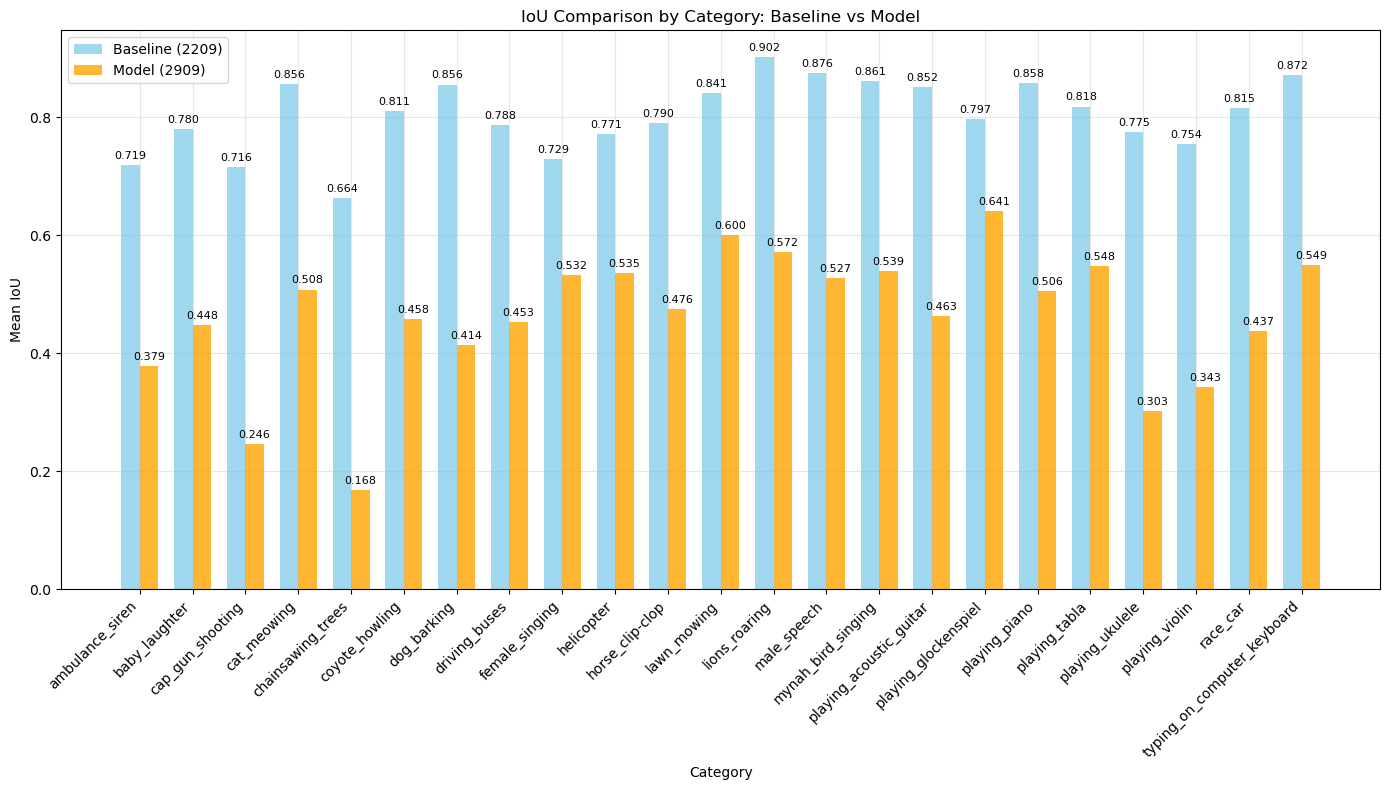

IoU Comparison by Category (Sorted by Difference %):
                             Baseline   Model  Difference  Difference %
category                                                               
playing_glockenspiel           0.7972  0.6405     -0.1567      -19.6599
female_singing                 0.7287  0.5321     -0.1967      -26.9904
lawn_mowing                    0.8409  0.6004     -0.2405      -28.6005
helicopter                     0.7712  0.5354     -0.2358      -30.5772
playing_tabla                  0.8182  0.5478     -0.2704      -33.0465
lions_roaring                  0.9025  0.5721     -0.3304      -36.6092
typing_on_computer_keyboard    0.8722  0.5493     -0.3228      -37.0145
mynah_bird_singing             0.8609  0.5392     -0.3217      -37.3699
male_speech                    0.8757  0.5273     -0.3484      -39.7888
horse_clip-clop                0.7903  0.4756     -0.3147      -39.8160
cat_meowing                    0.8563  0.5081     -0.3482      -40.6660
playing_pia

In [19]:
baseline_metrics = calculate_avg_metrics_by_category(baseline_df)
model_metrics = calculate_avg_metrics_by_category(model_df)

# plotting
categories = baseline_metrics.index
baseline_iou = baseline_metrics['miou']
model_iou = model_metrics['miou']

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(categories))
width = 0.35
bars1 = ax.bar(x - width/2, baseline_iou, width, label='Baseline (2209)', alpha=0.8, color='skyblue')
bars2 = ax.bar(x + width/2, model_iou, width, label='Model (2909)', alpha=0.8, color='orange')

ax.set_xlabel('Category')
ax.set_ylabel('Mean IoU')
ax.set_title('IoU Comparison by Category: Baseline vs Model')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()


# numerical
comparison_df = pd.DataFrame({
    'Baseline': baseline_metrics['miou'],
    'Model': model_metrics['miou'],
    'Difference': model_metrics['miou'] - baseline_metrics['miou'],
    'Difference %': ((model_metrics['miou'] - baseline_metrics['miou']) / baseline_metrics['miou'] * 100)
}).sort_values('Difference %', ascending=False)

print("IoU Comparison by Category (Sorted by Difference %):")
print("=" * 60)
print(comparison_df.round(4))

In [29]:
def find_biggest_iou_differences(baseline_df, model_df, n=10):
    # Merge dataframes on video_name and category to compare same samples
    merged_df = pd.merge(baseline_df, model_df, on=['video_name', 'category'], suffixes=('_baseline', '_model'))
    
    # Calculate difference (model - baseline)
    merged_df['iou_difference'] = merged_df['miou_model'] - merged_df['miou_baseline']
    merged_df['iou_difference_pct'] = (merged_df['iou_difference'] / merged_df['miou_baseline']) * 100
    
    # Sort by absolute difference to get biggest improvements and degradations
    merged_df['abs_iou_difference'] = abs(merged_df['iou_difference'])
    
    return merged_df.nlargest(n, 'abs_iou_difference')[
        ['video_name', 'category', 'miou_baseline', 'miou_model', 'iou_difference', 'iou_difference_pct']
    ]

biggest_differences = find_biggest_iou_differences(baseline_df, model_df, 10)

print("Top 10 Samples with Biggest IoU Differences:")
print("=" * 80)
print(biggest_differences.round(4).to_string(index=False))

Top 10 Samples with Biggest IoU Differences:
 video_name                    category  miou_baseline  miou_model  iou_difference  iou_difference_pct
P2GpecJsMqk                 dog_barking         0.9617      0.0616         -0.9001            -93.5984
2mZkKD9fBmc              playing_violin         0.8947      0.0410         -0.8537            -95.4166
-LR6jZzVFHs typing_on_computer_keyboard         0.9699      0.1187         -0.8512            -87.7652
Hw1M3Brm9HY               playing_piano         0.9518      0.1055         -0.8463            -88.9129
6MrXwLd80FI                    race_car         0.8547      0.0286         -0.8261            -96.6504
Rm-kGUiii40             ambulance_siren         0.8659      0.0498         -0.8161            -94.2476
eHAziqYEm3k           chainsawing_trees         0.8403      0.0259         -0.8144            -96.9187
g8Il7SnkD6E            cap_gun_shooting         0.8231      0.0204         -0.8028            -97.5243
iqbiV-ttlA8 typing_on_comput

In [30]:
# Calculate improvements vs degradations from ALL samples
merged_all = pd.merge(baseline_df, model_df, on=['video_name', 'category'], suffixes=('_baseline', '_model'))
merged_all['iou_difference'] = merged_all['miou_model'] - merged_all['miou_baseline']

all_improvements = merged_all[merged_all['iou_difference'] > 0]
all_degradations = merged_all[merged_all['iou_difference'] < 0]
no_change = merged_all[merged_all['iou_difference'] == 0]

print(f"\nTotal samples: {len(merged_all)}")
print(f"Improvements: {len(all_improvements)} samples ({len(all_improvements)/len(merged_all)*100:.1f}%)")
print(f"Degradations: {len(all_degradations)} samples ({len(all_degradations)/len(merged_all)*100:.1f}%)")
print(f"No change: {len(no_change)} samples ({len(no_change)/len(merged_all)*100:.1f}%)")


Total samples: 740
Improvements: 26 samples (3.5%)
Degradations: 714 samples (96.5%)
No change: 0 samples (0.0%)


In [44]:

print(f"\nTop 10 Improvements (from all samples):")
print("=" * 110)
print(f"{'Video Name':<20} {'Category':<35} {'Baseline':<10} {'Model':<10} {'Difference':>12}")
print("-" * 110)
top_improvements = all_improvements.nlargest(10, 'iou_difference')[
    ['video_name', 'category', 'miou_baseline', 'miou_model', 'iou_difference']
]
for idx, row in top_improvements.iterrows():
    print(f"{row['video_name']:<20} {row['category']:<35} {row['miou_baseline']:<10.4f} {row['miou_model']:<10.4f} {row['iou_difference']:>+12.4f}")


Top 10 Improvements (from all samples):
Video Name           Category                            Baseline   Model        Difference
--------------------------------------------------------------------------------------------------------------
2qi-Dc1EkJo          female_singing                      0.0145     0.5494          +0.5349
-rowxr24Xuw          female_singing                      0.0071     0.4355          +0.4284
6CT4pxtUClE          female_singing                      0.0506     0.4524          +0.4019
-Qap2iJF8pI          female_singing                      0.0428     0.4341          +0.3913
6ZQ7Ka3C5W4          female_singing                      0.0509     0.3077          +0.2568
1qAX0df3cWE          driving_buses                       0.0185     0.2664          +0.2479
-MqBuNdwrsk          female_singing                      0.5209     0.7023          +0.1815
MW1TsuXzkY4          playing_glockenspiel                0.7292     0.9064          +0.1772
PST4CTbdUxw         

In [45]:
print(f"\nTop 10 Degradations (from all samples):")
print("=" * 110)
print(f"{'Video Name':<20} {'Category':<35} {'Baseline':<10} {'Model':<10} {'Difference':>12}")
print("-" * 110)
top_degradations = all_degradations.nsmallest(10, 'iou_difference')[
    ['video_name', 'category', 'miou_baseline', 'miou_model', 'iou_difference']
]
for idx, row in top_degradations.iterrows():
    print(f"{row['video_name']:<20} {row['category']:<35} {row['miou_baseline']:<10.4f} {row['miou_model']:<10.4f} {row['iou_difference']:>12.4f}")

print("=" * 110)


Top 10 Degradations (from all samples):
Video Name           Category                            Baseline   Model        Difference
--------------------------------------------------------------------------------------------------------------
P2GpecJsMqk          dog_barking                         0.9617     0.0616          -0.9001
2mZkKD9fBmc          playing_violin                      0.8947     0.0410          -0.8537
-LR6jZzVFHs          typing_on_computer_keyboard         0.9699     0.1187          -0.8512
Hw1M3Brm9HY          playing_piano                       0.9518     0.1055          -0.8463
6MrXwLd80FI          race_car                            0.8547     0.0286          -0.8261
Rm-kGUiii40          ambulance_siren                     0.8659     0.0498          -0.8161
eHAziqYEm3k          chainsawing_trees                   0.8403     0.0259          -0.8144
g8Il7SnkD6E          cap_gun_shooting                    0.8231     0.0204          -0.8028
iqbiV-ttlA8         